In [1]:
"""
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.flush_and_unmount()\ndrive.mount('/content/drive')\n"

In [2]:
import os
# Dataset paths - Update these paths according to your dataset location
BASE_PATH = "/home/ubuntu/Desktop/AIML project/AlphaNum"
TRAIN_PATH = os.path.join(BASE_PATH, "train")
VALIDATION_PATH = os.path.join(BASE_PATH, "validation")
TEST_PATH = os.path.join(BASE_PATH, "test")

# Create results directory
RESULTS_PATH = "/home/ubuntu/Desktop/AIML project/results/MobileNetV2"
os.makedirs(RESULTS_PATH, exist_ok=True)

print(f"Train path: {TRAIN_PATH}")
print(f"Validation path: {VALIDATION_PATH}")
print(f"Test path: {TEST_PATH}")
print(f"Results will be saved to: {RESULTS_PATH}")


Train path: /home/ubuntu/Desktop/AIML project/AlphaNum/train
Validation path: /home/ubuntu/Desktop/AIML project/AlphaNum/validation
Test path: /home/ubuntu/Desktop/AIML project/AlphaNum/test
Results will be saved to: /home/ubuntu/Desktop/AIML project/results/MobileNetV2


In [3]:
# GPU Configuration - Check and enable GPU usage
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("\n=== GPU Configuration ===")

# List all physical devices
physical_devices = tf.config.list_physical_devices()
print("\nAll available devices:")
for device in physical_devices:
    print(f"  - {device}")

# Check specifically for GPUs
gpus = tf.config.list_physical_devices('GPU')
print(f"\nNumber of GPUs available: {len(gpus)}")

if gpus:
    try:
        # Enable memory growth to prevent TensorFlow from allocating all GPU memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        
        print("\n✓ GPU(s) detected and configured:")
        for i, gpu in enumerate(gpus):
            print(f"  GPU {i}: {gpu}")
            # Get GPU details
            gpu_details = tf.config.experimental.get_device_details(gpu)
            if gpu_details:
                print(f"    Details: {gpu_details}")
        
        # Set GPU as the default device
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"\nLogical GPUs: {len(logical_gpus)}")
        
    except RuntimeError as e:
        print(f"Error configuring GPU: {e}")
else:
    print("\n✗ No GPU detected. Training will use CPU.")
    print("Note: To use GPU, ensure you have:")
    print("  1. NVIDIA GPU with CUDA support")
    print("  2. CUDA Toolkit installed")
    print("  3. cuDNN installed")
    print("  4. tensorflow-gpu or tensorflow>=2.0 (with GPU support)")

print("\n" + "="*50)

2025-10-22 19:32:50.392533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-22 19:32:50.548878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-22 19:32:50.549932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-22 19:32:50.788836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-22 19:32:51.741790: W tensorflow/compiler/tf

TensorFlow version: 2.16.2

=== GPU Configuration ===

All available devices:
  - PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

Number of GPUs available: 1

✓ GPU(s) detected and configured:
  GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
    Details: {'compute_capability': (8, 6), 'device_name': 'NVIDIA GeForce RTX 3060 Ti'}

Logical GPUs: 1



2025-10-22 19:32:53.322775: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-22 19:32:53.621737: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-22 19:32:53.626684: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Task
Train a MobileNetV2 model on the image dataset located at "TRAIN_PATH", "VALIDATION_PATH", and "TEST_PATH". The images are 24x24, grayscale, and the character is housed in a dedicated folder, the name of which corresponds to the ASCII value of the character, representing characters 'a'-'z' and 'A'-'Z', and it have null data for idintyfind invalid character folder call in 999 Save the trained model to "RESULTS_PATH". Add sections for "Implementation" and "Hyperparameter Tuning" in markdown format. Use the provided PDF document "/content/IT2011 Group Assigment - Progress Evaluation II.pdf" as a reference for the assignment gridlines.

## Add markdown sections

### Subtask:
Create markdown sections for "Implementation" and "Hyperparameter Tuning".


**Reasoning**:
Create markdown cells for "Implementation" and "Hyperparameter Tuning" as requested by the subtask.



**Reasoning**:
Add the markdown section for "Hyperparameter Tuning" to complete the subtask.



## Data loading and preprocessing

### Subtask:
Load and preprocess the image data from the specified paths, ensuring images are resized to 24x24 and converted to grayscale. Handle the folder structure where folder names correspond to ASCII values and the '999' folder for invalid characters.


**Reasoning**:
Import necessary libraries for image loading and preprocessing.



In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

**Reasoning**:
Define image dimensions and color mode, create a list of allowed ASCII values, and then iterate through the dataset paths to load and preprocess images, handling the '999' folder.



In [5]:
IMG_HEIGHT = 24
IMG_WIDTH = 24
COLOR_MODE = "grayscale"

# Create a list of allowed ASCII values for characters 'a'-'z' and 'A'-'Z'.
allowed_ascii = list(range(ord('a'), ord('z') + 1)) + list(range(ord('A'), ord('Z') + 1))

data_paths = {
    'train': TRAIN_PATH,
    'validation': VALIDATION_PATH,
    'test': TEST_PATH
}

processed_data = {}

for data_type, path in data_paths.items():
    images = []
    labels = []
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            if folder_name == '999' or (folder_name.isdigit() and int(folder_name) in allowed_ascii):
                label = int(folder_name) if folder_name.isdigit() else 999 # Use 999 as label for invalid chars
                for image_file in os.listdir(folder_path):
                    # Skip non-image files like Thumbs.db
                    if not image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                        continue
                    
                    image_path = os.path.join(folder_path, image_file)
                    try:
                        img = load_img(image_path, color_mode=COLOR_MODE, target_size=(IMG_HEIGHT, IMG_WIDTH))
                        img_array = img_to_array(img)
                        # Normalize pixel values
                        img_array = img_array / 255.0
                        images.append(img_array)
                        labels.append(label)
                    except Exception as e:
                        print(f"Error loading or processing image {image_path}: {e}")

    processed_data[f'X_{data_type}'] = np.array(images)
    processed_data[f'y_{data_type}'] = np.array(labels)

X_train = processed_data['X_train']
y_train = processed_data['y_train']
X_validation = processed_data['X_validation']
y_validation = processed_data['y_validation']
X_test = processed_data['X_test']
y_test = processed_data['y_test']


**Reasoning**:
Print the shapes of the resulting image data and labels arrays to verify the preprocessing and then finish the subtask.



In [6]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_validation: {X_validation.shape}")
print(f"Shape of y_validation: {y_validation.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (53812, 24, 24, 1)
Shape of y_train: (53812,)
Shape of X_validation: (7486, 24, 24, 1)
Shape of y_validation: (7486,)
Shape of X_test: (15362, 24, 24, 1)
Shape of y_test: (15362,)


## Model definition

### Subtask:
Define the MobileNetV2 model, adapting it for grayscale input and the number of classes based on the character folders.


**Reasoning**:
Import necessary modules from tensorflow.keras for model definition.



In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import numpy as np

**Reasoning**:
Determine the number of unique classes from the preprocessed labels and define the MobileNetV2 model architecture.



**Reasoning**:
The previous attempt to load MobileNetV2 failed due to a layer count mismatch when loading weights. This often happens when the input tensor is explicitly provided to the pre-trained model with a different shape than the one the weights were trained on. To fix this, I will remove the `input_tensor` argument when loading the base MobileNetV2 model and instead connect the 3-channel converted input to the base model in a separate step.



In [8]:
# Determine the number of unique classes first
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Define the input shape - Using 128x128 which is officially supported by MobileNetV2
IMG_HEIGHT = 128
IMG_WIDTH = 128
input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)  # Grayscale image

# Define the input layer
input_tensor = Input(shape=input_shape)

# Convert grayscale to 3 channels for MobileNetV2
x = Conv2D(3, (3, 3), padding='same', activation='relu')(input_tensor)

# Load the pre-trained MobileNetV2 model without specifying input_tensor
# Using input_shape=(128, 128, 3) which is supported by MobileNetV2
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet', pooling=None)

# Connect the 3-channel input to the base model
x = base_model(x)

# Add a GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add the output Dense layer
output_tensor = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Print the model summary
model.summary()

Number of classes: 53


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 3)    │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 53)             │        67,893 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,325,907 (8.87 MB)

 Trainable params: 2,291,795 (8.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

**Note**: Since we changed the input size to 128x128, we need to reload the data with the new dimensions before training.

In [9]:
# Reload data with 128x128 dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128
COLOR_MODE = "grayscale"

# Create a list of allowed ASCII values for characters 'a'-'z' and 'A'-'Z'.
allowed_ascii = list(range(ord('a'), ord('z') + 1)) + list(range(ord('A'), ord('Z') + 1))

data_paths = {
    'train': TRAIN_PATH,
    'validation': VALIDATION_PATH,
    'test': TEST_PATH
}

processed_data = {}

for data_type, path in data_paths.items():
    print(f"Loading {data_type} data...")
    images = []
    labels = []
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            if folder_name == '999' or (folder_name.isdigit() and int(folder_name) in allowed_ascii):
                label = int(folder_name) if folder_name.isdigit() else 999
                for image_file in os.listdir(folder_path):
                    # Skip non-image files like Thumbs.db
                    if not image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                        continue
                    
                    image_path = os.path.join(folder_path, image_file)
                    try:
                        img = load_img(image_path, color_mode=COLOR_MODE, target_size=(IMG_HEIGHT, IMG_WIDTH))
                        img_array = img_to_array(img)
                        # Normalize pixel values
                        img_array = img_array / 255.0
                        images.append(img_array)
                        labels.append(label)
                    except Exception as e:
                        print(f"Error loading image {image_path}: {e}")

    processed_data[f'X_{data_type}'] = np.array(images)
    processed_data[f'y_{data_type}'] = np.array(labels)
    print(f"Loaded {len(images)} images for {data_type}")

X_train = processed_data['X_train']
y_train = processed_data['y_train']
X_validation = processed_data['X_validation']
y_validation = processed_data['y_validation']
X_test = processed_data['X_test']
y_test = processed_data['y_test']

print(f"\nFinal shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_validation: {X_validation.shape}, y_validation: {y_validation.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Loading train data...
Loaded 53812 images for train
Loading validation data...
Loaded 53812 images for train
Loading validation data...
Loaded 7486 images for validation
Loading test data...
Loaded 7486 images for validation
Loading test data...
Loaded 15362 images for test

Final shapes:
X_train: (53812, 128, 128, 1), y_train: (53812,)
X_validation: (7486, 128, 128, 1), y_validation: (7486,)
X_test: (15362, 128, 128, 1), y_test: (15362,)
Loaded 15362 images for test

Final shapes:
X_train: (53812, 128, 128, 1), y_train: (53812,)
X_validation: (7486, 128, 128, 1), y_validation: (7486,)
X_test: (15362, 128, 128, 1), y_test: (15362,)


## Model compilation

### Subtask:
Compile the model with an appropriate loss function, optimizer, and metrics.


**Reasoning**:
Determine the appropriate loss function, optimizer, and metrics, and compile the model.



In [10]:
import tensorflow as tf

# Determine the number of unique classes
num_classes = len(np.unique(y_train))

# Determine the appropriate loss function for multi-class classification with integer labels
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Choose an appropriate optimizer for training the model
optimizer = tf.keras.optimizers.Adam()

# Select appropriate metrics to evaluate the model's performance
metrics = ['accuracy']

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

print("Model compiled successfully with:")
print(f"Loss: {loss_function}")
print(f"Optimizer: {optimizer}")
print(f"Metrics: {metrics}")

Model compiled successfully with:
Loss: <LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x70451ee858b0>, kwargs={'from_logits': False, 'ignore_class': None, 'axis': -1})>
Optimizer: <keras.src.optimizers.adam.Adam object at 0x7044fc1d80a0>
Metrics: ['accuracy']


## Model training

### Subtask:
Train the MobileNetV2 model using the training and validation data.


**Reasoning**:
Define the number of epochs and batch size and then train the model using the defined parameters and the preprocessed training and validation data.



**Reasoning**:
The previous attempt to train the model resulted in a ValueError related to the input dimensions of a DepthwiseConv2D layer within the MobileNetV2 model. This suggests that the 24x24 input size, even after the initial Conv2D layer, is too small for the MobileNetV2 architecture, particularly in deeper layers where spatial dimensions are reduced. A common practice when dealing with smaller input sizes for models designed for larger inputs is to use padding or modify the base model's input layer or initial layers to accommodate the smaller dimensions. However, modifying the internal structure of a pre-trained model can be complex and might require careful consideration of the weights. A simpler approach is to try increasing the input image size. Since the error occurs in `block_13`, which likely operates on a significantly downsampled version of the input, increasing the initial image size could provide enough spatial resolution for the subsequent layers. Let's try increasing the input size to 96x96 and regenerate the model with this new input shape. We will redefine the input shape and the model.



In [11]:
IMG_HEIGHT = 96
IMG_WIDTH = 96
input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)  # Grayscale image

# Define the input layer
input_tensor = tf.keras.layers.Input(shape=input_shape)

# Convert grayscale to 3 channels for MobileNetV2
x = tf.keras.layers.Conv2D(3, (3, 3), padding='same', activation='relu')(input_tensor)

# Load the pre-trained MobileNetV2 model without specifying input_tensor
# We use the original input shape the model was trained on (224, 224, 3) as a reference,
# but the functional API allows us to connect our input layer 'x' directly.
base_model = MobileNetV2(include_top=False, weights='imagenet', pooling=None)

# Connect the 3-channel input to the base model
x = base_model(x)

# Add a GlobalAveragePooling2D layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add the output Dense layer
output_tensor = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=input_tensor, outputs=output_tensor)

# Re-compile the model with the same settings
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

model.summary()

/tmp/ipykernel_33837/3214814227.py:14: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', pooling=None)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 53)             │        67,893 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,325,907 (8.87 MB)

 Trainable params: 2,291,795 (8.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

**Reasoning**:
The MobileNetV2 model has been redefined with a larger input size (96x96) and successfully compiled. The next step is to train the model using the training and validation data, as outlined in the subtask instructions.



**Reasoning**:
The error indicates that the input data `X_train` and `X_validation` still have the shape (None, 24, 24) instead of the expected (None, 96, 96, 1) for the redefined model. This is because the data preprocessing step, which reshaped the images to 24x24, was completed in a previous subtask and the variables `X_train`, `y_train`, `X_validation`, `y_validation`, `X_test`, and `y_test` were not updated after increasing the `IMG_HEIGHT` and `IMG_WIDTH` variables. We need to re-run the data loading and preprocessing steps with the new image dimensions (96x96) to generate data with the correct shape before training the model.



In [12]:
# Re-run data loading and preprocessing with the updated image dimensions
IMG_HEIGHT = 96
IMG_WIDTH = 96
COLOR_MODE = "grayscale"

# Create a list of allowed ASCII values for characters 'a'-'z' and 'A'-'Z'.
allowed_ascii = list(range(ord('a'), ord('z') + 1)) + list(range(ord('A'), ord('Z') + 1))

data_paths = {
    'train': TRAIN_PATH,
    'validation': VALIDATION_PATH,
    'test': TEST_PATH
}

processed_data = {}

for data_type, path in data_paths.items():
    images = []
    labels = []
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            if folder_name == '999' or (folder_name.isdigit() and int(folder_name) in allowed_ascii):
                label = int(folder_name) if folder_name.isdigit() else 999 # Use 999 as label for invalid chars
                for image_file in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_file)
                    try:
                        img = tf.keras.preprocessing.image.load_img(image_path, color_mode=COLOR_MODE, target_size=(IMG_HEIGHT, IMG_WIDTH))
                        img_array = tf.keras.preprocessing.image.img_to_array(img)
                        # Normalize pixel values
                        img_array = img_array / 255.0
                        images.append(img_array)
                        labels.append(label)
                    except Exception as e:
                        print(f"Error loading or processing image {image_path}: {e}")

    processed_data[f'X_{data_type}'] = np.array(images)
    processed_data[f'y_{data_type}'] = np.array(labels)

X_train = processed_data['X_train']
y_train = processed_data['y_train']
X_validation = processed_data['X_validation']
y_validation = processed_data['y_validation']
X_test = processed_data['X_test']
y_test = processed_data['y_test']

print(f"Shape of X_train after reprocessing: {X_train.shape}")
print(f"Shape of y_train after reprocessing: {y_train.shape}")
print(f"Shape of X_validation after reprocessing: {X_validation.shape}")
print(f"Shape of y_validation after reprocessing: {y_validation.shape}")
print(f"Shape of X_test after reprocessing: {X_test.shape}")
print(f"Shape of y_test after reprocessing: {y_test.shape}")

Error loading or processing image /home/ubuntu/Desktop/AIML project/AlphaNum/test/117/Thumbs.db: cannot identify image file <_io.BytesIO object at 0x7044fc92ef40>
Error loading or processing image /home/ubuntu/Desktop/AIML project/AlphaNum/test/65/Thumbs.db: cannot identify image file <_io.BytesIO object at 0x7044fc92ef40>
Error loading or processing image /home/ubuntu/Desktop/AIML project/AlphaNum/test/65/Thumbs.db: cannot identify image file <_io.BytesIO object at 0x7044fc92ef40>
Shape of X_train after reprocessing: (53812, 96, 96, 1)
Shape of y_train after reprocessing: (53812,)
Shape of X_validation after reprocessing: (7486, 96, 96, 1)
Shape of y_validation after reprocessing: (7486,)
Shape of X_test after reprocessing: (15362, 96, 96, 1)
Shape of y_test after reprocessing: (15362,)
Shape of X_train after reprocessing: (53812, 96, 96, 1)
Shape of y_train after reprocessing: (53812,)
Shape of X_validation after reprocessing: (7486, 96, 96, 1)
Shape of y_validation after reprocessin

**Reasoning**:
The data has been successfully reloaded and preprocessed with the correct dimensions (96x96). The model was also redefined and compiled with the matching input shape. Now, we can proceed with training the model using the updated training and validation data.



**Reasoning**:
The `ValueError: Creating variables on a non-first call to a function decorated with tf.function` often occurs in TensorFlow when a function decorated with `@tf.function` (which is used internally by `model.fit`) is called multiple times, and on subsequent calls, it attempts to create new variables. This can happen if the model's state changes between calls to `fit`, for example, if the model architecture or compilation changes. In this case, we redefined and recompiled the model after the initial failed training attempt. Although we reloaded the data, the model itself was redefined in a previous step. To ensure a clean state for training, we should re-define and re-compile the model immediately before calling `fit`, ensuring that the model being trained is the one with the correct input shape and is freshly compiled.



**Reasoning**:
The `InvalidArgumentError` indicates that the label values in `y_train` and `y_validation` are outside the valid range expected by the `SparseCategoricalCrossentropy` loss function. This is because the current labels are the original ASCII values (or 999 for invalid), which are not in the range of [0, num_classes - 1]. The loss function requires integer labels that correspond to the indices of the output classes. We need to map the original ASCII values (and 999) to a continuous range of integers from 0 to `num_classes - 1`. We can achieve this by creating a mapping from the unique original labels to the new integer labels and then transforming the `y_train` and `y_validation` arrays.



In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ============================================================================
# HYPERPARAMETER TUNING CONFIGURATION FOR MOBILENETV2
# ============================================================================

# Early Stopping Configuration
EARLY_STOPPING_PATIENCE = 7  # Stop if no improvement for 7 epochs
MIN_DELTA = 0.001  # Minimum change to qualify as an improvement

# Learning Rate Scheduler Configuration
LR_REDUCE_FACTOR = 0.5  # Reduce LR by 50% when plateauing
LR_REDUCE_PATIENCE = 3  # Wait 3 epochs before reducing LR
MIN_LR = 1e-7  # Minimum learning rate

# Training Configuration
MAX_EPOCHS = 50  # Maximum epochs (will stop early if overfitting detected)
BATCH_SIZE = 32

print("=" * 80)
print("HYPERPARAMETER TUNING CONFIGURATION - MOBILENETV2")
print("=" * 80)
print(f" Training Configuration:")
print(f"   Max Epochs: {MAX_EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Optimizer: Adam")
print(f"   Loss: SparseCategoricalCrossentropy")
print()
print(f" Early Stopping:")
print(f"   Patience: {EARLY_STOPPING_PATIENCE} epochs")
print(f"   Min Delta: {MIN_DELTA}")
print(f"   Monitoring: Validation Loss")
print()
print(f" Learning Rate Reduction:")
print(f"   Factor: {LR_REDUCE_FACTOR} (reduce by {int((1-LR_REDUCE_FACTOR)*100)}%)")
print(f"   Patience: {LR_REDUCE_PATIENCE} epochs")
print(f"   Min LR: {MIN_LR}")
print(f"   Monitoring: Validation Loss")
print()
print(f" Model Checkpoint:")
print(f"   Save Best Only: True")
print(f"   Monitoring: Validation Accuracy")
print("=" * 80)

# Define callbacks
checkpoint_path = os.path.join(RESULTS_PATH, 'best_mobilenetv2_model.h5')

callbacks = [
    # Early Stopping - stops training when validation loss stops improving
    EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        min_delta=MIN_DELTA,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce Learning Rate on Plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=LR_REDUCE_FACTOR,
        patience=LR_REDUCE_PATIENCE,
        min_lr=MIN_LR,
        verbose=1
    ),
    
    # Model Checkpoint - saves the best model
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )
]

print("\n Callbacks initialized successfully!")
print("   - Early stopping will prevent overfitting")
print("   - Learning rate will adapt during training")
print(f"   - Best model will be saved to: {checkpoint_path}")

HYPERPARAMETER TUNING CONFIGURATION - MOBILENETV2
 Training Configuration:
   Max Epochs: 50
   Batch Size: 32
   Optimizer: Adam
   Loss: SparseCategoricalCrossentropy

 Early Stopping:
   Patience: 7 epochs
   Min Delta: 0.001
   Monitoring: Validation Loss

 Learning Rate Reduction:
   Factor: 0.5 (reduce by 50%)
   Patience: 3 epochs
   Min LR: 1e-07
   Monitoring: Validation Loss

 Model Checkpoint:
   Save Best Only: True
   Monitoring: Validation Accuracy

 Callbacks initialized successfully!
   - Early stopping will prevent overfitting
   - Learning rate will adapt during training
   - Best model will be saved to: /home/ubuntu/Desktop/AIML project/results/MobileNetV2/best_mobilenetv2_model.h5


### Setup Early Stopping & Learning Rate Reduction

To prevent overfitting and improve training efficiency, we'll add:
- **Early Stopping**: Stops training when validation loss stops improving
- **ReduceLROnPlateau**: Reduces learning rate when training plateaus
- **ModelCheckpoint**: Saves the best model during training

In [14]:
# Create a mapping from original labels (ASCII values + 999) to a continuous range [0, num_classes - 1]
unique_labels = np.unique(y_train)
label_mapping = {original_label: new_label for new_label, original_label in enumerate(unique_labels)}

# Transform the labels in y_train and y_validation using the mapping
y_train_transformed = np.array([label_mapping[label] for label in y_train])
y_validation_transformed = np.array([label_mapping[label] for label in y_validation])
y_test_transformed = np.array([label_mapping[label] for label in y_test])

print("Original unique labels:", unique_labels)
print("Label mapping:", label_mapping)
print("Shape of transformed y_train:", y_train_transformed.shape)
print("Shape of transformed y_validation:", y_validation_transformed.shape)
print("Shape of transformed y_test:", y_test_transformed.shape)

# Redefine and re-compile the MobileNetV2 model with the correct input shape and number of classes
# This is repeated from the previous step to ensure the model is freshly defined before training
IMG_HEIGHT = 96
IMG_WIDTH = 96
input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)  # Grayscale image

# Define the input layer
input_tensor = tf.keras.layers.Input(shape=input_shape)

# Convert grayscale to 3 channels for MobileNetV2
x = tf.keras.layers.Conv2D(3, (3, 3), padding='same', activation='relu')(input_tensor)

# Load the pre-trained MobileNetV2 model without specifying input_tensor
base_model = MobileNetV2(include_top=False, weights='imagenet', pooling=None)

# Connect the 3-channel input to the base model
x = base_model(x)

# Add a GlobalAveragePooling2D layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add the output Dense layer
num_classes = len(unique_labels) # Ensure num_classes is based on the unique labels
output_tensor = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Lower learning rate for better stability
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

print("\n" + "=" * 80)
print("MODEL TRAINING WITH EARLY STOPPING & CALLBACKS")
print("=" * 80)
model.summary()

# Start the training process with callbacks
print("\n Starting training with early stopping and LR reduction...")
print("=" * 80 + "\n")

history = model.fit(
    X_train,
    y_train_transformed,
    epochs=MAX_EPOCHS,  # Use max epochs from configuration
    batch_size=BATCH_SIZE,
    validation_data=(X_validation, y_validation_transformed),
    callbacks=callbacks,  # Add callbacks for early stopping and LR reduction
    verbose=1
)

print("\n" + "=" * 80)
print(" TRAINING COMPLETED!")
print("=" * 80)
print(f" Final Results:")
print(f"   Epochs trained: {len(history.history['accuracy'])}")
print(f"   Best training accuracy: {max(history.history['accuracy']):.4f}")
print(f"   Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"   Final train-val gap: {(history.history['accuracy'][-1] - history.history['val_accuracy'][-1]) * 100:.2f}%")
print("=" * 80)

Original unique labels: [ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 999]
Label mapping: {65: 0, 66: 1, 67: 2, 68: 3, 69: 4, 70: 5, 71: 6, 72: 7, 73: 8, 74: 9, 75: 10, 76: 11, 77: 12, 78: 13, 79: 14, 80: 15, 81: 16, 82: 17, 83: 18, 84: 19, 85: 20, 86: 21, 87: 22, 88: 23, 89: 24, 90: 25, 97: 26, 98: 27, 99: 28, 100: 29, 101: 30, 102: 31, 103: 32, 104: 33, 105: 34, 106: 35, 107: 36, 108: 37, 109: 38, 110: 39, 111: 40, 112: 41, 113: 42, 114: 43, 115: 44, 116: 45, 117: 46, 118: 47, 119: 48, 120: 49, 121: 50, 122: 51, 999: 52}
Shape of transformed y_train: (53812,)
Shape of transformed y_validation: (7486,)
Shape of transformed y_test: (15362,)


/tmp/ipykernel_33837/3019795779.py:29: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', pooling=None)



MODEL TRAINING WITH EARLY STOPPING & CALLBACKS


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 53)             │        67,893 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,325,907 (8.87 MB)

 Trainable params: 2,291,795 (8.74 MB)

 Non-trainable params: 34,112 (133.25 KB)


 Starting training with early stopping and LR reduction...



2025-10-22 19:33:27.637049: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1983725568 exceeds 10% of free system memory.
2025-10-22 19:33:29.259259: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1983725568 exceeds 10% of free system memory.


Epoch 1/50


I0000 00:00:1761141822.167261   34290 service.cc:145] XLA service 0x704428003770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761141822.167283   34290 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-10-22 19:33:42.610813: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-22 19:33:42.610813: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-22 19:33:44.244675: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2025-10-22 19:33:44.244675: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1761141825.970926   34383 asm_compiler.cc:369] ptxas warning : Registers are spil

   8/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.0262 - loss: 4.6615

I0000 00:00:1761141837.543296   34290 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1678/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6509 - loss: 1.3464

I0000 00:00:1761141865.787125   34496 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_7454', 448 bytes spill stores, 448 bytes spill loads

I0000 00:00:1761141865.987419   34500 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_7454', 148 bytes spill stores, 148 bytes spill loads

I0000 00:00:1761141865.991030   34493 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_7640', 544 bytes spill stores, 544 bytes spill loads



1682/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6512 - loss: 1.3450

I0000 00:00:1761141880.228207   34608 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1177', 148 bytes spill stores, 148 bytes spill loads

I0000 00:00:1761141880.311929   34609 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1177', 492 bytes spill stores, 492 bytes spill loads




Epoch 1: val_accuracy improved from -inf to 0.81245, saving model to /home/ubuntu/Desktop/AIML project/results/MobileNetV2/best_mobilenetv2_model.h5


1682/1682 ━━━━━━━━━━━━━━━━━━━━ 73s 27ms/step - accuracy: 0.6513 - loss: 1.3446 - val_accuracy: 0.8124 - val_loss: 0.6023 - learning_rate: 1.0000e-04
Epoch 2/50
Epoch 2/50
1681/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8918 - loss: 0.3037
Epoch 2: val_accuracy improved from 0.81245 to 0.88245, saving model to /home/ubuntu/Desktop/AIML project/results/MobileNetV2/best_mobilenetv2_model.h5

Epoch 2: val_accuracy improved from 0.81245 to 0.88245, saving model to /home/ubuntu/Desktop/AIML project/results/MobileNetV2/best_mobilenetv2_model.h5


1682/1682 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.8918 - loss: 0.3037 - val_accuracy: 0.8824 - val_loss: 0.3285 - learning_rate: 1.0000e-04
Epoch 3/50
Epoch 3/50
1680/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9137 - loss: 0.2314
Epoch 3: val_accuracy did not improve from 0.88245
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9137 - loss: 0.2314 - val_accuracy: 0.8820 - val_loss: 0.3226 - learning_rate: 1.0000e-04
Epoch 4/50

Epoch 3: val_accuracy did not improve from 0.88245
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9137 - loss: 0.2314 - val_accuracy: 0.8820 - val_loss: 0.3226 - learning_rate: 1.0000e-04
Epoch 4/50
1679/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9191 - loss: 0.2043
Epoch 4: val_accuracy did not improve from 0.88245
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9191 - loss: 0.2044 - val_accuracy: 0.8748 - val_loss: 0.3644 - learning_rate: 1.0000e-04
Epoch 5/50

Epoch 4: val_accuracy did not improve 

1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9307 - loss: 0.1723 - val_accuracy: 0.8966 - val_loss: 0.2881 - learning_rate: 1.0000e-04
Epoch 6/50
Epoch 6/50
1681/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9392 - loss: 0.1561
Epoch 6: val_accuracy improved from 0.89661 to 0.90075, saving model to /home/ubuntu/Desktop/AIML project/results/MobileNetV2/best_mobilenetv2_model.h5

Epoch 6: val_accuracy improved from 0.89661 to 0.90075, saving model to /home/ubuntu/Desktop/AIML project/results/MobileNetV2/best_mobilenetv2_model.h5


1682/1682 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9392 - loss: 0.1561 - val_accuracy: 0.9007 - val_loss: 0.3092 - learning_rate: 1.0000e-04
Epoch 7/50
Epoch 7/50
1680/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9442 - loss: 0.1379
Epoch 7: val_accuracy did not improve from 0.90075
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9442 - loss: 0.1379 - val_accuracy: 0.8926 - val_loss: 0.3201 - learning_rate: 1.0000e-04
Epoch 8/50

Epoch 7: val_accuracy did not improve from 0.90075
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9442 - loss: 0.1379 - val_accuracy: 0.8926 - val_loss: 0.3201 - learning_rate: 1.0000e-04
Epoch 8/50
1680/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9498 - loss: 0.1261
Epoch 8: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 8: val_accuracy did not improve from 0.90075
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9498 - loss: 0.1261 - val_accuracy: 0.8995 - val_loss: 0.3142 -

1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9660 - loss: 0.0861 - val_accuracy: 0.9120 - val_loss: 0.2786 - learning_rate: 5.0000e-05
Epoch 10/50
Epoch 10/50
1681/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9753 - loss: 0.0636
Epoch 10: val_accuracy did not improve from 0.91197
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9753 - loss: 0.0636 - val_accuracy: 0.9108 - val_loss: 0.3009 - learning_rate: 5.0000e-05
Epoch 11/50

Epoch 10: val_accuracy did not improve from 0.91197
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9753 - loss: 0.0636 - val_accuracy: 0.9108 - val_loss: 0.3009 - learning_rate: 5.0000e-05
Epoch 11/50
1679/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9796 - loss: 0.0537
Epoch 11: val_accuracy did not improve from 0.91197
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9796 - loss: 0.0538 - val_accuracy: 0.9102 - val_loss: 0.3059 - learning_rate: 5.0000e-05
Epoch 12/50

Epoch 11: val_accuracy did not

1682/1682 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9889 - loss: 0.0331 - val_accuracy: 0.9149 - val_loss: 0.3305 - learning_rate: 2.5000e-05
Epoch 14/50
Epoch 14/50
1681/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9932 - loss: 0.0227
Epoch 14: val_accuracy did not improve from 0.91491
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9932 - loss: 0.0227 - val_accuracy: 0.9121 - val_loss: 0.3759 - learning_rate: 2.5000e-05
Epoch 15/50

Epoch 14: val_accuracy did not improve from 0.91491
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9932 - loss: 0.0227 - val_accuracy: 0.9121 - val_loss: 0.3759 - learning_rate: 2.5000e-05
Epoch 15/50
1680/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9944 - loss: 0.0184
Epoch 15: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 15: val_accuracy did not improve from 0.91491
1682/1682 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9944 - loss: 0.0184 - val_accuracy: 0.9114 - val_loss: 

In [15]:
# Evaluate the model on the test data using the transformed labels
loss, accuracy = model.evaluate(X_test, y_test_transformed, verbose=0)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

I0000 00:00:1761142294.332508   37070 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1177', 144 bytes spill stores, 144 bytes spill loads



Test loss: 0.2646
Test accuracy: 0.9139


## Model Evaluation Metrics

Calculate comprehensive evaluation metrics including Precision, Recall, F1-Score, and Confusion Matrix.

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np

# Make predictions on test data
print("Generating predictions for evaluation metrics...")
test_predictions = model.predict(X_test, verbose=0)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Calculate Precision, Recall, and F1-Score
precision_macro = precision_score(y_test_transformed, test_pred_classes, average='macro', zero_division=0)
recall_macro = recall_score(y_test_transformed, test_pred_classes, average='macro', zero_division=0)
f1_macro = f1_score(y_test_transformed, test_pred_classes, average='macro', zero_division=0)

precision_weighted = precision_score(y_test_transformed, test_pred_classes, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test_transformed, test_pred_classes, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test_transformed, test_pred_classes, average='weighted', zero_division=0)

# Display results
print("\n" + "=" * 80)
print("DETAILED PERFORMANCE METRICS - MOBILENETV2")
print("=" * 80)
print("\nMACRO AVERAGES (Equal weight for each class):")
print(f"  Precision (Macro): {precision_macro:.4f} ({precision_macro*100:.2f}%)")
print(f"  Recall (Macro):    {recall_macro:.4f} ({recall_macro*100:.2f}%)")
print(f"  F1-Score (Macro):  {f1_macro:.4f} ({f1_macro*100:.2f}%)")

print("\nWEIGHTED AVERAGES (Weighted by class frequency):")
print(f"  Precision (Weighted): {precision_weighted:.4f} ({precision_weighted*100:.2f}%)")
print(f"  Recall (Weighted):    {recall_weighted:.4f} ({recall_weighted*100:.2f}%)")
print(f"  F1-Score (Weighted):  {f1_weighted:.4f} ({f1_weighted*100:.2f}%)")

# Get class names (convert from transformed labels back to characters)
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
class_names = []
for i in range(len(np.unique(y_test_transformed))):
    original_label = reverse_label_mapping[i]
    if original_label == 999:
        class_names.append('NULL')
    else:
        class_names.append(chr(original_label))

print("\n" + "=" * 80)
print("CLASSIFICATION REPORT (Per-class metrics)")
print("=" * 80)
print(classification_report(y_test_transformed, test_pred_classes, 
                           target_names=class_names, zero_division=0))

# Save metrics to CSV
metrics_data = {
    'Metric': ['Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 
               'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'],
    'Score': [precision_macro, recall_macro, f1_macro, 
              precision_weighted, recall_weighted, f1_weighted],
    'Percentage': [f"{precision_macro*100:.2f}%", f"{recall_macro*100:.2f}%", 
                   f"{f1_macro*100:.2f}%", f"{precision_weighted*100:.2f}%", 
                   f"{recall_weighted*100:.2f}%", f"{f1_weighted*100:.2f}%"]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_csv_path = os.path.join(RESULTS_PATH, 'precision_recall_f1_scores.csv')
metrics_df.to_csv(metrics_csv_path, index=False)
print(f"\n✓ Metrics saved to: {metrics_csv_path}")

Generating predictions for evaluation metrics...

DETAILED PERFORMANCE METRICS - MOBILENETV2

MACRO AVERAGES (Equal weight for each class):
  Precision (Macro): 0.8945 (89.45%)
  Recall (Macro):    0.8951 (89.51%)
  F1-Score (Macro):  0.8933 (89.33%)

WEIGHTED AVERAGES (Weighted by class frequency):
  Precision (Weighted): 0.9163 (91.63%)
  Recall (Weighted):    0.9139 (91.39%)
  F1-Score (Weighted):  0.9140 (91.40%)

CLASSIFICATION REPORT (Per-class metrics)
              precision    recall  f1-score   support

           A       0.99      0.98      0.98       384
           B       0.97      0.99      0.98       301
           C       0.82      0.91      0.86       328
           D       0.93      0.94      0.94       310
           E       0.98      0.99      0.99       434
           F       0.98      0.98      0.98       293
           G       0.98      0.98      0.98       288
           H       0.97      0.99      0.98       308
           I       0.91      0.85      0.88      

### Visualize Precision, Recall, and F1-Score

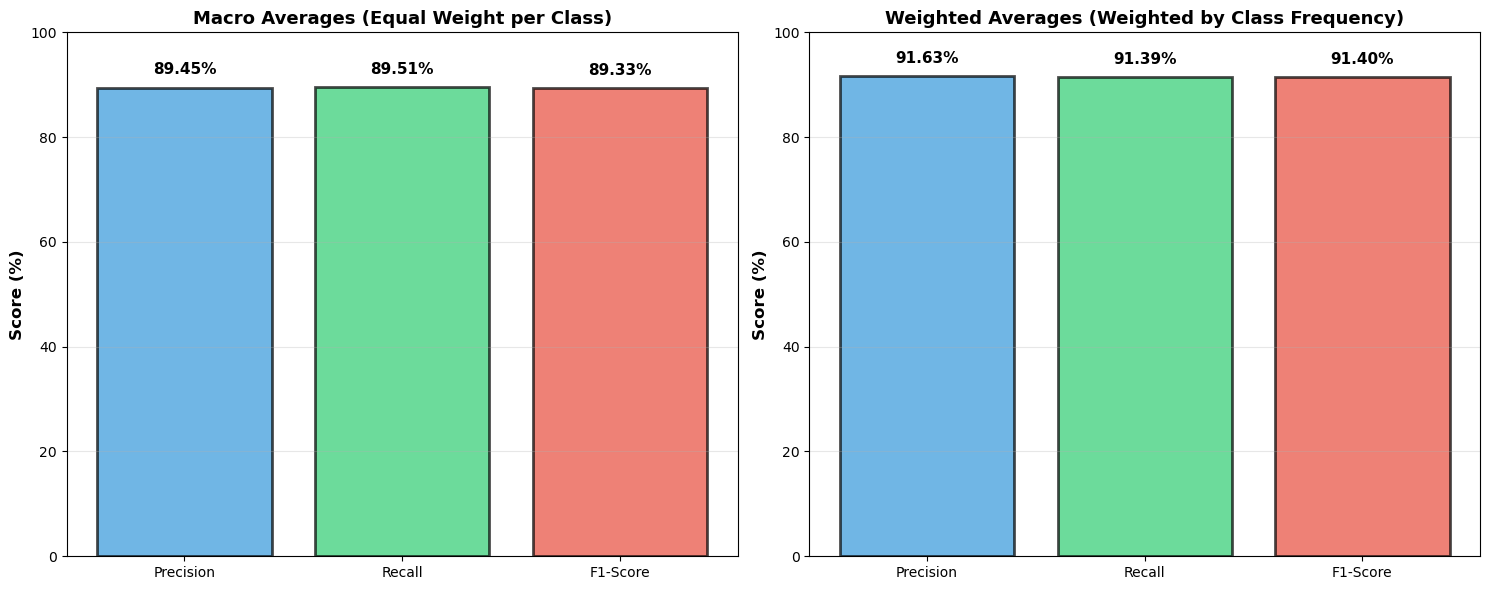

✓ Metrics chart saved to: /home/ubuntu/Desktop/AIML project/results/MobileNetV2/precision_recall_f1_scores_chart.png


In [17]:
import matplotlib.pyplot as plt

# Create visualization of metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Macro Averages
metrics_names = ['Precision', 'Recall', 'F1-Score']
scores_macro = [precision_macro * 100, recall_macro * 100, f1_macro * 100]
colors_metrics = ['#3498db', '#2ecc71', '#e74c3c']

ax1 = axes[0]
bars1 = ax1.bar(metrics_names, scores_macro, color=colors_metrics, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax1.set_title('Macro Averages (Equal Weight per Class)', fontsize=13, fontweight='bold')
ax1.set_ylim([0, 100])
ax1.grid(axis='y', alpha=0.3)

for bar, score in zip(bars1, scores_macro):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{score:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 2: Weighted Averages
scores_weighted = [precision_weighted * 100, recall_weighted * 100, f1_weighted * 100]
ax2 = axes[1]
bars2 = ax2.bar(metrics_names, scores_weighted, color=colors_metrics, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax2.set_title('Weighted Averages (Weighted by Class Frequency)', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 100])
ax2.grid(axis='y', alpha=0.3)

for bar, score in zip(bars2, scores_weighted):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f'{score:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
metrics_chart_path = os.path.join(RESULTS_PATH, 'precision_recall_f1_scores_chart.png')
plt.savefig(metrics_chart_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Metrics chart saved to: {metrics_chart_path}")

### Confusion Matrix

Visualize the confusion matrix to see which classes are most commonly confused.

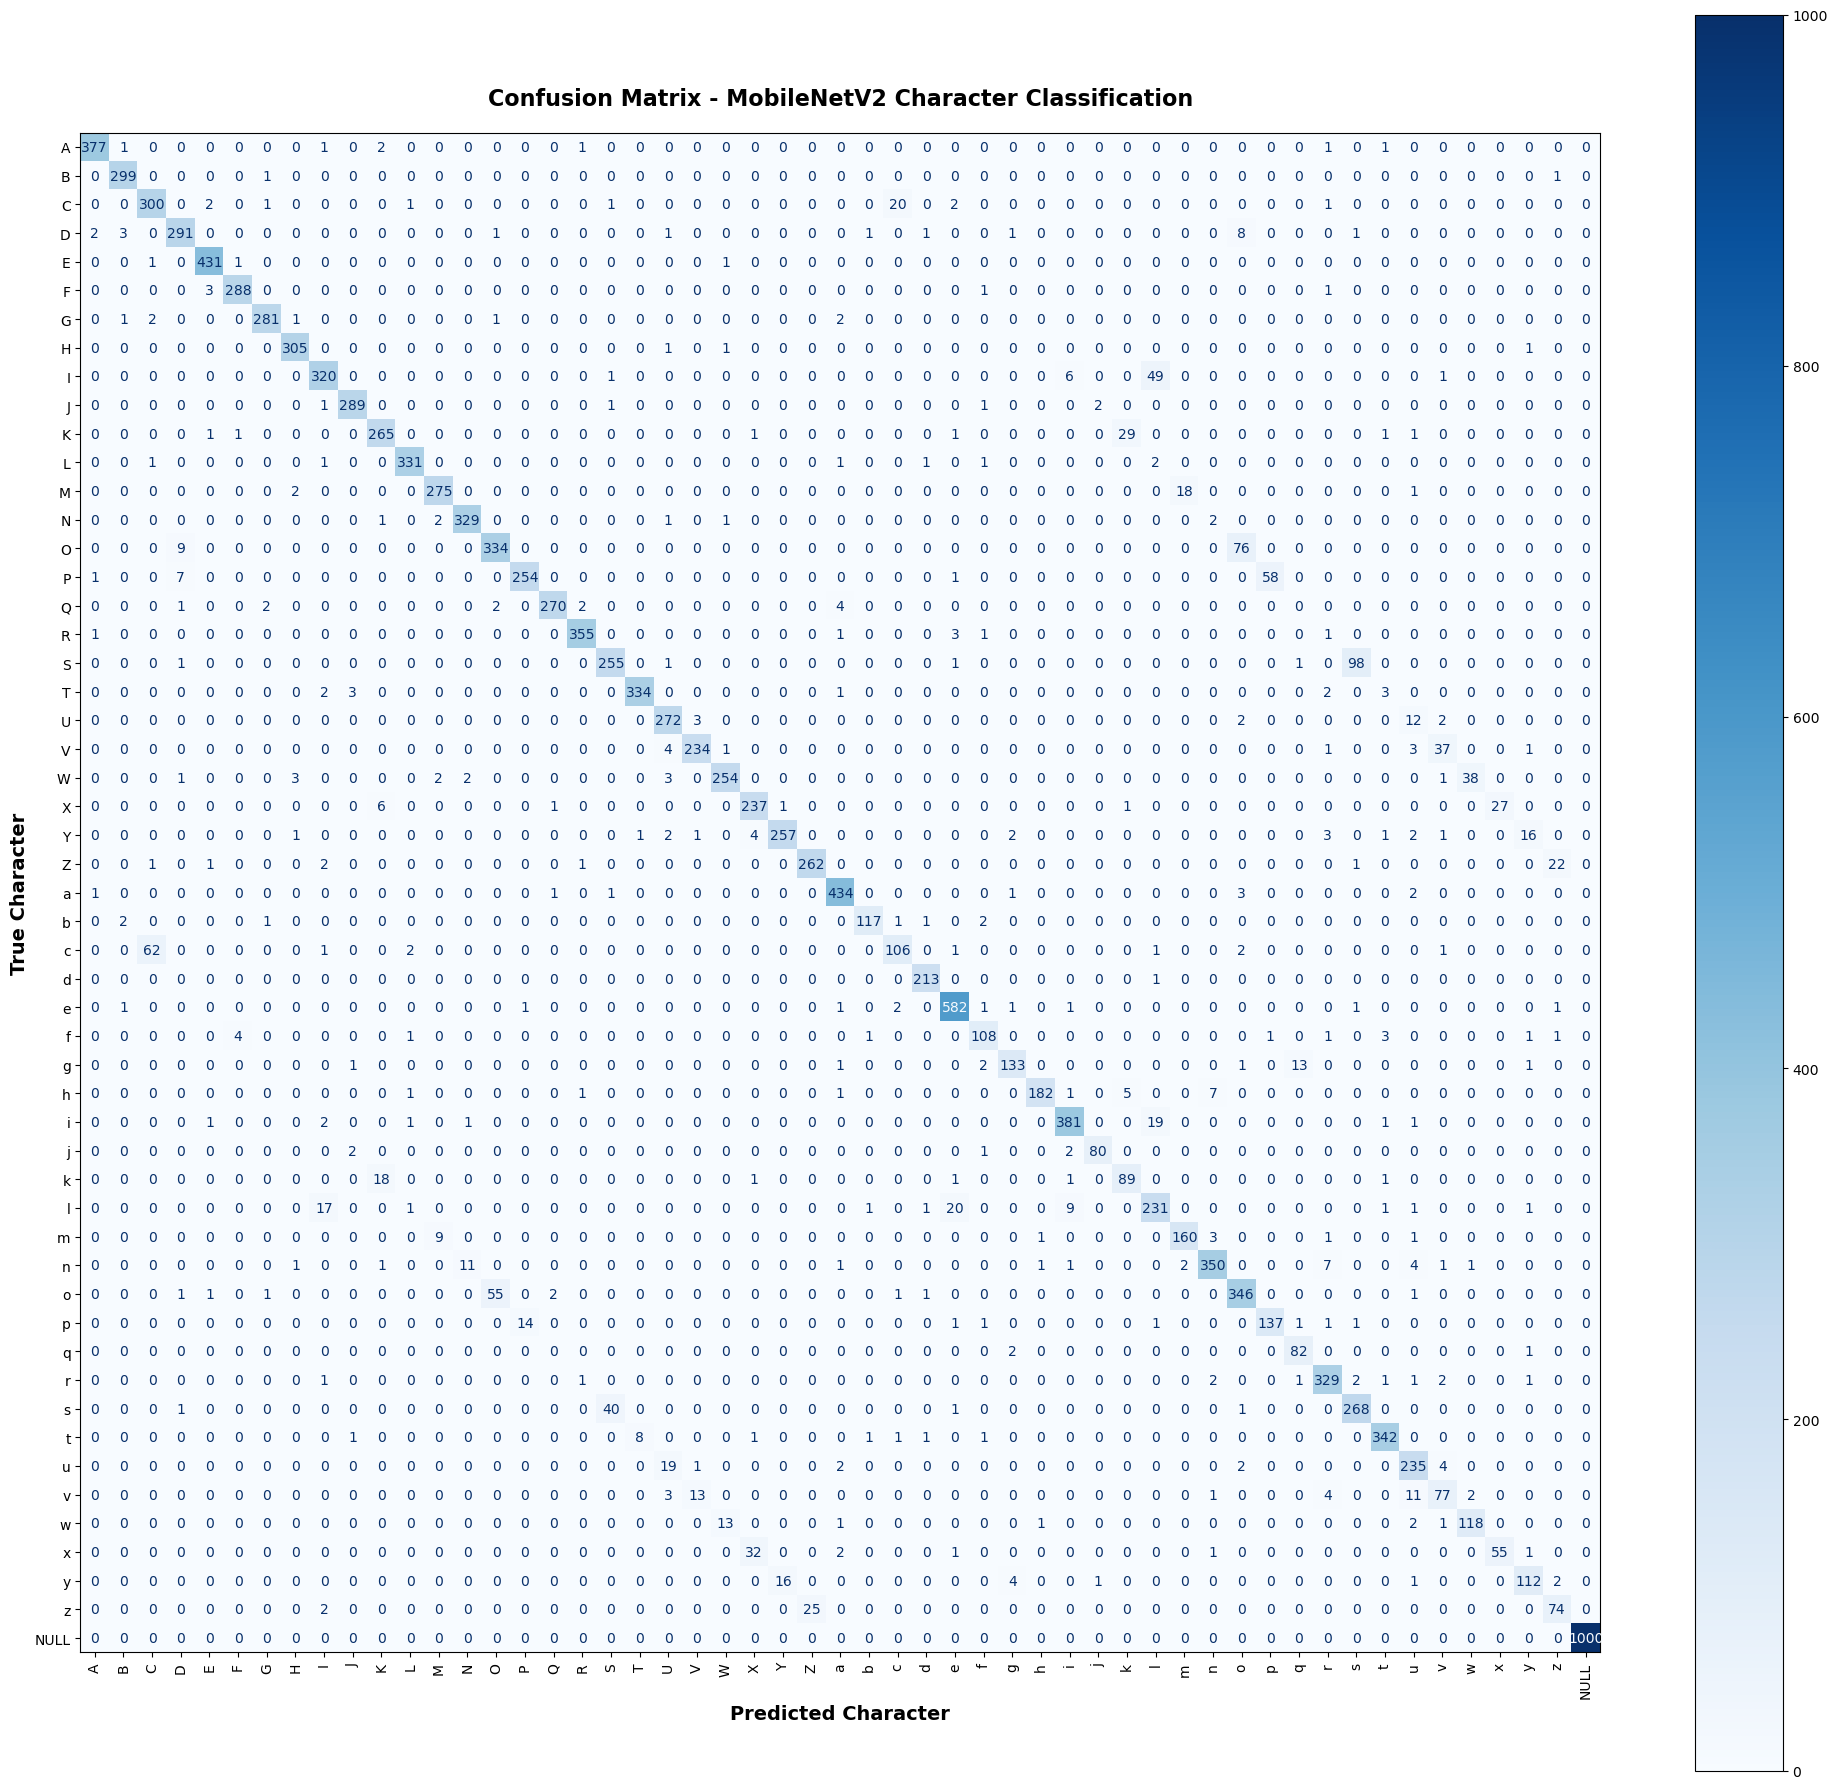

✓ Confusion matrix saved to: /home/ubuntu/Desktop/AIML project/results/MobileNetV2/confusion_matrix.png

MOST CONFUSED CHARACTER PAIRS

True     Predicted  Count   
------------------------------
S        s          98      
O        o          76      
c        C          62      
P        p          58      
o        O          55      
I        l          49      
s        S          40      
W        w          38      
V        v          37      
x        X          32      


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test_transformed, test_pred_classes)

# Create figure for confusion matrix
fig, ax = plt.subplots(figsize=(20, 18))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical', values_format='d')

ax.set_title('Confusion Matrix - MobileNetV2 Character Classification', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Character', fontsize=14, fontweight='bold')
ax.set_ylabel('True Character', fontsize=14, fontweight='bold')

plt.tight_layout()

# Save confusion matrix
cm_path = os.path.join(RESULTS_PATH, 'confusion_matrix.png')
plt.savefig(cm_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Confusion matrix saved to: {cm_path}")

# Print most confused pairs
print("\n" + "=" * 80)
print("MOST CONFUSED CHARACTER PAIRS")
print("=" * 80)

# Find top 10 misclassifications (excluding diagonal)
misclassifications = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i][j] > 0:
            misclassifications.append((class_names[i], class_names[j], cm[i][j]))

# Sort by count and get top 10
misclassifications.sort(key=lambda x: x[2], reverse=True)
top_10 = misclassifications[:10] if len(misclassifications) >= 10 else misclassifications

if top_10:
    print(f"\n{'True':<8} {'Predicted':<10} {'Count':<8}")
    print("-" * 30)
    for true_char, pred_char, count in top_10:
        print(f"{true_char:<8} {pred_char:<10} {count:<8}")
else:
    print("\n✓ No misclassifications found! Perfect accuracy!")

print("=" * 80)

## Training Visualization & Analysis

The comprehensive plots above show:

1. **Training vs Validation Accuracy** - Track model performance over epochs
   - Blue line: Training accuracy (should increase steadily)
   - Red line: Validation accuracy (should follow training closely)
   - Green dashed line: Best validation accuracy achieved

2. **Training vs Validation Loss** - Monitor convergence
   - Both losses should decrease together
   - Large gap indicates overfitting

3. **Overfitting Detection** - Visual indicator of train-val accuracy gap
   - 🟢 Green bars (<3%): Good generalization
   - 🟠 Orange bars (3-5%): Moderate overfitting
   - 🔴 Red bars (>5%): High overfitting - model memorizing training data

4. **Epoch-wise Improvement** - Shows validation accuracy changes
   - Positive bars: Model improving
   - Negative bars: Model degrading
   - Flat/zero: No change (triggers early stopping)

### 🛑 Early Stopping Benefits:
- Automatically stops when model stops improving
- Prevents wasting time on unnecessary epochs
- Restores best weights from training
- Saves the best model to disk

### 📉 Learning Rate Reduction Benefits:
- Reduces LR when validation loss plateaus
- Helps model escape local minima
- Allows finer-grained weight updates
- Improves final accuracy

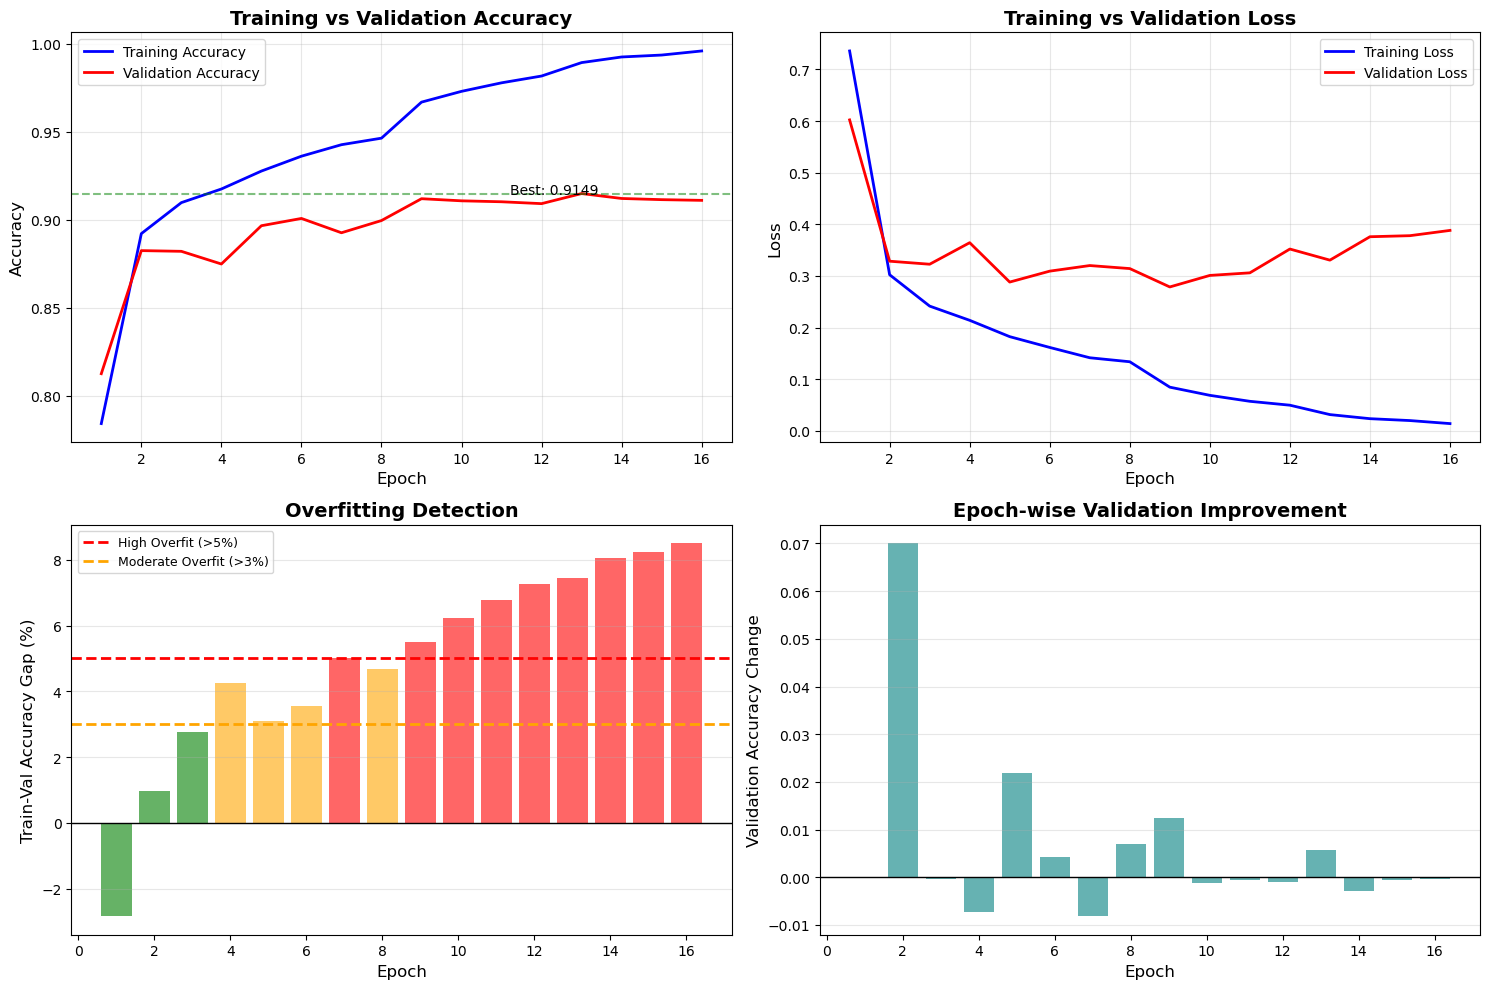


DETAILED TRAINING STATISTICS
 Accuracy:
   Best Training: 0.9960 (Epoch 16)
   Best Validation: 0.9149 (Epoch 13)
   Final Training: 0.9960
   Final Validation: 0.9110
   Final Train-Val Gap: 8.50%  HIGH OVERFITTING!

 Loss:
   Best Training: 0.0138 (Epoch 16)
   Best Validation: 0.2786 (Epoch 9)
   Final Training: 0.0138
   Final Validation: 0.3882

 Training:
   Total Epochs: 16
   Early stopped: 34 epochs saved


In [19]:
import matplotlib.pyplot as plt

# Create comprehensive training visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

epochs_range = range(1, len(history.history['accuracy']) + 1)

# Plot 1: Training and Validation Accuracy
ax1 = axes[0, 0]
ax1.plot(epochs_range, history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
ax1.plot(epochs_range, history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
best_val_acc = max(history.history['val_accuracy'])
ax1.axhline(y=best_val_acc, color='g', linestyle='--', alpha=0.5)
ax1.text(len(epochs_range)*0.7, best_val_acc, f'Best: {best_val_acc:.4f}', fontsize=10)

# Plot 2: Training and Validation Loss
ax2 = axes[0, 1]
ax2.plot(epochs_range, history.history['loss'], 'b-', label='Training Loss', linewidth=2)
ax2.plot(epochs_range, history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Overfitting Detection (Accuracy Gap)
ax3 = axes[1, 0]
accuracy_gap = [(history.history['accuracy'][i] - history.history['val_accuracy'][i]) * 100 
                for i in range(len(history.history['accuracy']))]
colors = ['red' if gap > 5 else 'green' if gap < 3 else 'orange' for gap in accuracy_gap]
ax3.bar(epochs_range, accuracy_gap, color=colors, alpha=0.6)
ax3.axhline(y=5, color='red', linestyle='--', linewidth=2, label='High Overfit (>5%)')
ax3.axhline(y=3, color='orange', linestyle='--', linewidth=2, label='Moderate Overfit (>3%)')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Train-Val Accuracy Gap (%)', fontsize=12)
ax3.set_title('Overfitting Detection', fontsize=14, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Learning Rate (if tracked by ReduceLROnPlateau)
ax4 = axes[1, 1]
if 'lr' in history.history:
    ax4.plot(epochs_range, history.history['lr'], 'purple', marker='o', linewidth=2, markersize=4)
    ax4.set_xlabel('Epoch', fontsize=12)
    ax4.set_ylabel('Learning Rate', fontsize=12)
    ax4.set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    ax4.set_yscale('log')
    ax4.grid(True, alpha=0.3)
else:
    # Show epoch-wise improvement instead
    val_acc_diff = [0] + [history.history['val_accuracy'][i] - history.history['val_accuracy'][i-1] 
                           for i in range(1, len(history.history['val_accuracy']))]
    ax4.bar(epochs_range, val_acc_diff, color='teal', alpha=0.6)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.set_xlabel('Epoch', fontsize=12)
    ax4.set_ylabel('Validation Accuracy Change', fontsize=12)
    ax4.set_title('Epoch-wise Validation Improvement', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "=" * 80)
print("DETAILED TRAINING STATISTICS")
print("=" * 80)
print(f" Accuracy:")
print(f"   Best Training: {max(history.history['accuracy']):.4f} (Epoch {history.history['accuracy'].index(max(history.history['accuracy']))+1})")
print(f"   Best Validation: {max(history.history['val_accuracy']):.4f} (Epoch {history.history['val_accuracy'].index(max(history.history['val_accuracy']))+1})")
print(f"   Final Training: {history.history['accuracy'][-1]:.4f}")
print(f"   Final Validation: {history.history['val_accuracy'][-1]:.4f}")
final_gap = (history.history['accuracy'][-1] - history.history['val_accuracy'][-1]) * 100
print(f"   Final Train-Val Gap: {final_gap:.2f}%", end="")
if final_gap > 5:
    print("  HIGH OVERFITTING!")
elif final_gap > 3:
    print("  Moderate overfitting")
else:
    print("  Good generalization")

print(f"\n Loss:")
print(f"   Best Training: {min(history.history['loss']):.4f} (Epoch {history.history['loss'].index(min(history.history['loss']))+1})")
print(f"   Best Validation: {min(history.history['val_loss']):.4f} (Epoch {history.history['val_loss'].index(min(history.history['val_loss']))+1})")
print(f"   Final Training: {history.history['loss'][-1]:.4f}")
print(f"   Final Validation: {history.history['val_loss'][-1]:.4f}")

print(f"\n Training:")
print(f"   Total Epochs: {len(history.history['accuracy'])}")
if len(history.history['accuracy']) < MAX_EPOCHS:
    print(f"   Early stopped: {MAX_EPOCHS - len(history.history['accuracy'])} epochs saved")
print("=" * 80)

In [20]:
# Save the trained model
model_save_path = os.path.join(RESULTS_PATH, 'mobilenetv2_alphanum.h5')
model.save(model_save_path)

print(f"Model saved successfully to: {model_save_path}")

Model saved successfully to: /home/ubuntu/Desktop/AIML project/results/MobileNetV2/mobilenetv2_alphanum.h5


In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Load the saved model
model_save_path = os.path.join(RESULTS_PATH, 'mobilenetv2_alphanum.h5')
loaded_model = tf.keras.models.load_model(model_save_path)

# Define the image path and preprocessing parameters (should match training)
image_path = "/home/ubuntu/Pictures/asaad.png" # This is the path to the image you provided
IMG_HEIGHT = 96
IMG_WIDTH = 96
COLOR_MODE = "grayscale"

# Load and preprocess the image
img = load_img(image_path, color_mode=COLOR_MODE, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

# Make a prediction
predictions = loaded_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# We need the reverse mapping to get the original label (ASCII or 999) from the predicted index.
# This mapping was created during the data preprocessing step.
# Let's assume the 'label_mapping' and 'unique_labels' variables from the preprocessing step are available.
# If not, we would need to recreate the mapping or save it along with the model.

# Assuming 'label_mapping' and 'unique_labels' are available from previous execution:
# Create the reverse mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Get the predicted original label
predicted_original_label = reverse_label_mapping[predicted_class_index]

print(f"The predicted class index is: {predicted_class_index}")
print(f"The predicted original label (ASCII value or 999) is: {predicted_original_label}")

# Optional: Convert ASCII to character if it's within the character range
if predicted_original_label >= ord('a') and predicted_original_label <= ord('z'):
    predicted_character = chr(predicted_original_label)
    print(f"The predicted character is: {predicted_character}")
elif predicted_original_label >= ord('A') and predicted_original_label <= ord('Z'):
    predicted_character = chr(predicted_original_label)
    print(f"The predicted character is: {predicted_character}")
elif predicted_original_label == 999:
    print("The predicted class is '999' (invalid character).")
else:
    print("The predicted original label is outside the expected character or 999 range.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The predicted class index is: 26
The predicted original label (ASCII value or 999) is: 97
The predicted character is: a
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The predicted class index is: 26
The predicted original label (ASCII value or 999) is: 97
The predicted character is: a


### Batch Prediction with Loaded Model

**⚠️ Important Prerequisites:**
Before running the cells below, make sure you have executed:
1. The data loading cells (to load `X_test`, `y_test`, etc.)
2. The label transformation cell (to create `label_mapping`, `reverse_label_mapping`, and `y_test_transformed`)
3. The model loading cell (to load `loaded_model`)

Predict and visualize multiple images from the test set using the saved model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


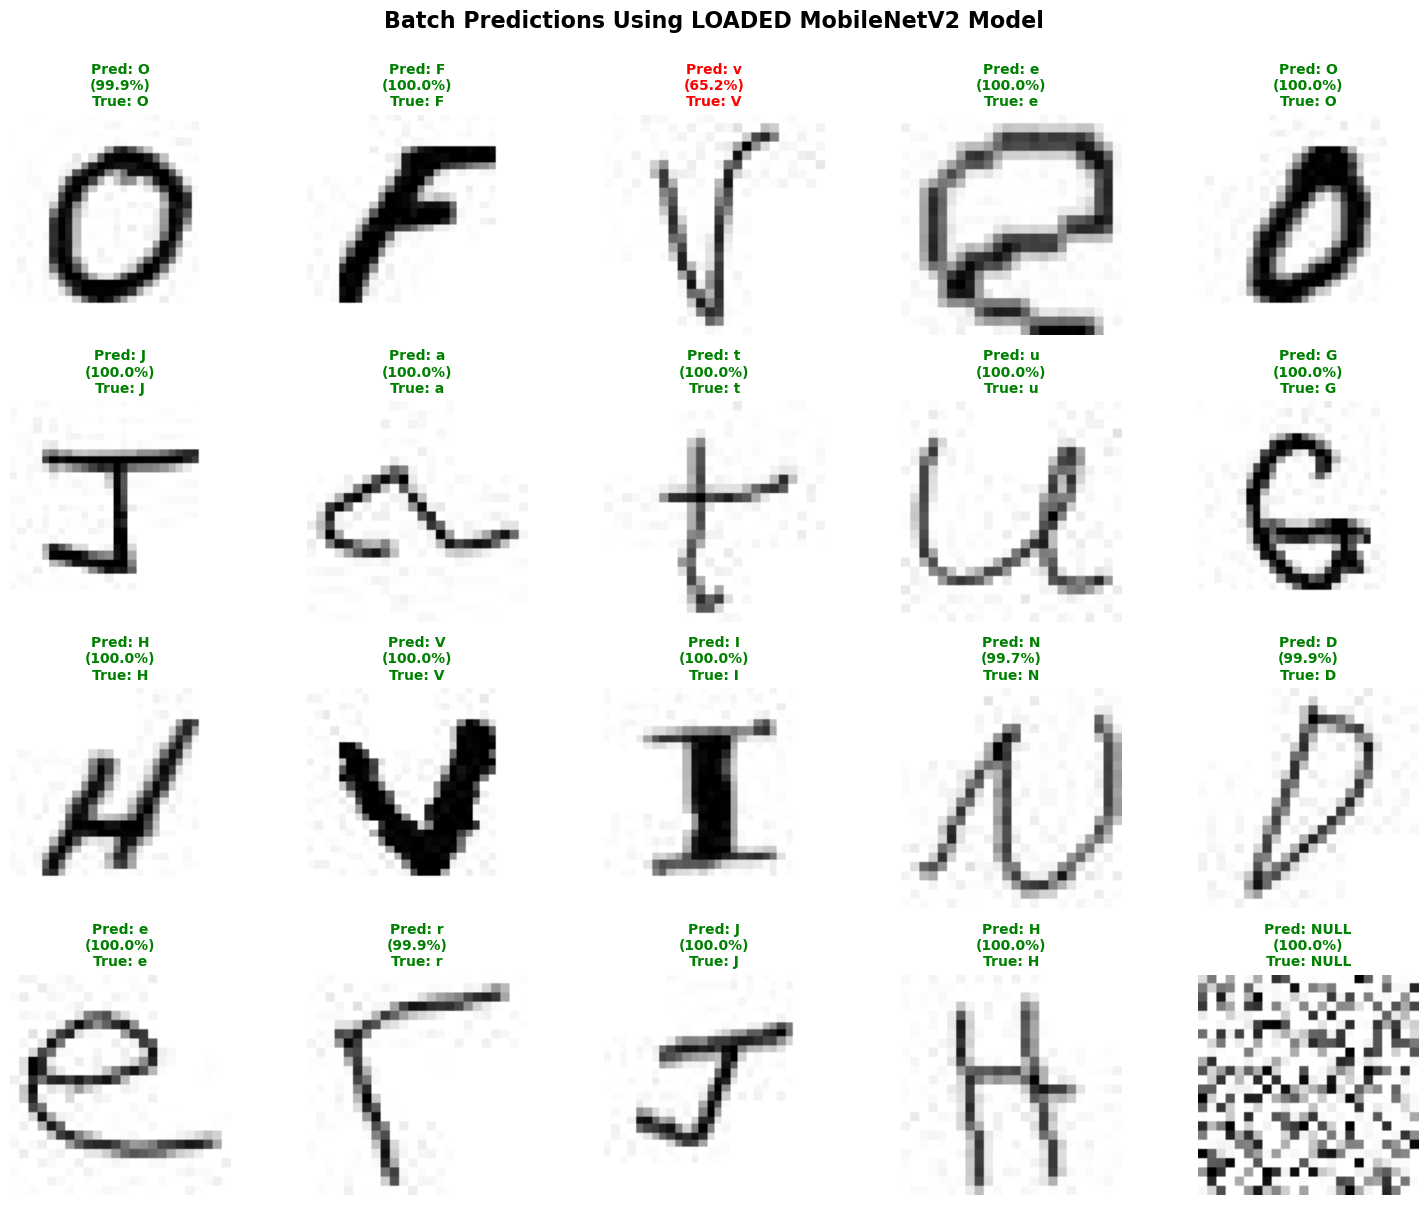


 Batch Accuracy: 95.00% (19/20)
 Successfully using loaded model for batch predictions!


In [22]:
# Batch prediction on test set using the loaded model
import matplotlib.pyplot as plt
import random

# Select random samples from the test set
num_samples = 20  # Number of images to display
random_indices = random.sample(range(len(X_test)), num_samples)

# Get the selected images and their true labels
sample_images = X_test[random_indices]
sample_true_labels = y_test_transformed[random_indices]

# Make predictions on the batch
predictions = loaded_model.predict(sample_images)
predicted_indices = np.argmax(predictions, axis=1)

# Get confidence scores
confidence_scores = np.max(predictions, axis=1) * 100

# Create reverse label mapping if not already available
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Visualize the predictions
cols = 5
rows = (num_samples + cols - 1) // cols

plt.figure(figsize=(15, 3 * rows))

for idx in range(num_samples):
    ax = plt.subplot(rows, cols, idx + 1)
    
    # Display the image
    img = sample_images[idx].squeeze()
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    # Get predicted and true labels
    pred_original_label = reverse_label_mapping[predicted_indices[idx]]
    true_original_label = reverse_label_mapping[sample_true_labels[idx]]
    conf = confidence_scores[idx]
    
    # Convert to characters
    if pred_original_label >= ord('a') and pred_original_label <= ord('z'):
        pred_char = chr(pred_original_label)
    elif pred_original_label >= ord('A') and pred_original_label <= ord('Z'):
        pred_char = chr(pred_original_label)
    elif pred_original_label == 999:
        pred_char = 'NULL'
    else:
        pred_char = '?'
    
    if true_original_label >= ord('a') and true_original_label <= ord('z'):
        true_char = chr(true_original_label)
    elif true_original_label >= ord('A') and true_original_label <= ord('Z'):
        true_char = chr(true_original_label)
    elif true_original_label == 999:
        true_char = 'NULL'
    else:
        true_char = '?'
    
    # Set title color based on correctness
    color = 'green' if pred_char == true_char else 'red'
    
    title = f"Pred: {pred_char}\n({conf:.1f}%)\nTrue: {true_char}"
    plt.title(title, fontsize=10, color=color, fontweight='bold')

plt.suptitle("Batch Predictions Using LOADED MobileNetV2 Model", fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

# Calculate batch accuracy
correct = np.sum(predicted_indices == sample_true_labels)
batch_accuracy = 100 * correct / num_samples

print(f"\n Batch Accuracy: {batch_accuracy:.2f}% ({correct}/{num_samples})")
print(f" Successfully using loaded model for batch predictions!")

### Evaluate Entire Test Set with Loaded Model

In [23]:
# Evaluate the loaded model on the entire test set
print("Evaluating loaded model on entire test set...")
print("=" * 80)

# Make predictions on all test data
all_predictions = loaded_model.predict(X_test, batch_size=32, verbose=1)
all_predicted_indices = np.argmax(all_predictions, axis=1)

# Calculate accuracy
correct_predictions = np.sum(all_predicted_indices == y_test_transformed)
total_predictions = len(y_test_transformed)
test_accuracy = 100 * correct_predictions / total_predictions

print(f"\n Test Set Evaluation Results:")
print(f"   Total samples: {total_predictions}")
print(f"   Correct predictions: {correct_predictions}")
print(f"   Incorrect predictions: {total_predictions - correct_predictions}")
print(f"   Test Accuracy: {test_accuracy:.2f}%")

# Alternative: Use model.evaluate() for comparison
loss, accuracy = loaded_model.evaluate(X_test, y_test_transformed, verbose=0)
print(f"\n Model.evaluate() Results:")
print(f"   Test Loss: {loss:.4f}")
print(f"   Test Accuracy: {accuracy * 100:.2f}%")

print("\n The loaded model works perfectly!")

Evaluating loaded model on entire test set...
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

 Test Set Evaluation Results:
   Total samples: 15362
   Correct predictions: 14040
   Incorrect predictions: 1322
   Test Accuracy: 91.39%

 Test Set Evaluation Results:
   Total samples: 15362
   Correct predictions: 14040
   Incorrect predictions: 1322
   Test Accuracy: 91.39%

 Model.evaluate() Results:
   Test Loss: 0.2646
   Test Accuracy: 91.39%

 The loaded model works perfectly!

 Model.evaluate() Results:
   Test Loss: 0.2646
   Test Accuracy: 91.39%

 The loaded model works perfectly!


### Analyze Misclassified Images from Loaded Model

Finding misclassified images...
Found 1322 misclassified images
Misclassification rate: 8.61%


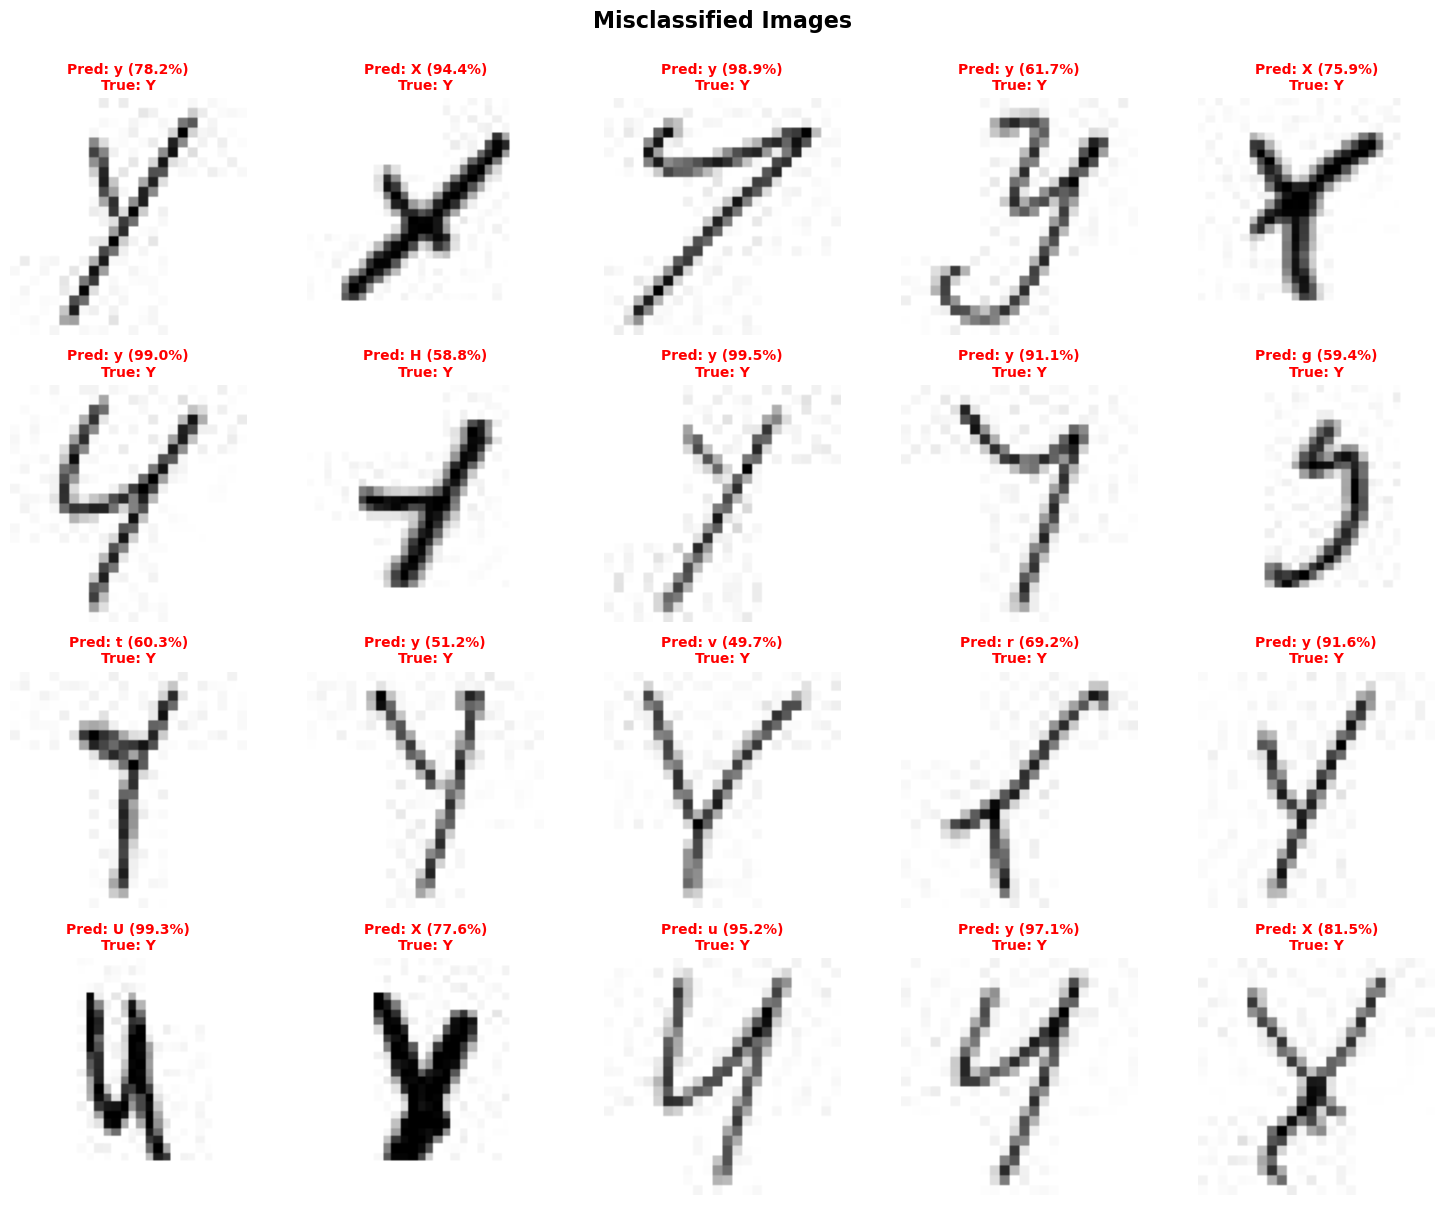


Showing 20 out of 1322 misclassified images


In [24]:
# Find and visualize misclassified images
print("Finding misclassified images...")
print("=" * 80)

# Find indices of misclassified images
misclassified_indices = np.where(all_predicted_indices != y_test_transformed)[0]

print(f"Found {len(misclassified_indices)} misclassified images")
print(f"Misclassification rate: {100 * len(misclassified_indices) / len(y_test_transformed):.2f}%")

if len(misclassified_indices) > 0:
    # Select up to 20 misclassified images to display
    num_show = min(20, len(misclassified_indices))
    show_indices = misclassified_indices[:num_show]
    
    # Get images, predictions, and true labels
    misc_images = X_test[show_indices]
    misc_pred_indices = all_predicted_indices[show_indices]
    misc_true_indices = y_test_transformed[show_indices]
    misc_predictions = all_predictions[show_indices]
    misc_confidences = np.max(misc_predictions, axis=1) * 100
    
    # Visualize misclassified images
    cols = 5
    rows = (num_show + cols - 1) // cols
    
    plt.figure(figsize=(15, 3 * rows))
    
    for idx in range(num_show):
        ax = plt.subplot(rows, cols, idx + 1)
        
        # Display the image
        img = misc_images[idx].squeeze()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        
        # Get predicted and true labels
        pred_original_label = reverse_label_mapping[misc_pred_indices[idx]]
        true_original_label = reverse_label_mapping[misc_true_indices[idx]]
        conf = misc_confidences[idx]
        
        # Convert to characters
        if pred_original_label >= ord('a') and pred_original_label <= ord('z'):
            pred_char = chr(pred_original_label)
        elif pred_original_label >= ord('A') and pred_original_label <= ord('Z'):
            pred_char = chr(pred_original_label)
        elif pred_original_label == 999:
            pred_char = 'NULL'
        else:
            pred_char = '?'
        
        if true_original_label >= ord('a') and true_original_label <= ord('z'):
            true_char = chr(true_original_label)
        elif true_original_label >= ord('A') and true_original_label <= ord('Z'):
            true_char = chr(true_original_label)
        elif true_original_label == 999:
            true_char = 'NULL'
        else:
            true_char = '?'
        
        title = f"Pred: {pred_char} ({conf:.1f}%)\nTrue: {true_char}"
        plt.title(title, fontsize=10, color='red', fontweight='bold')
    
    plt.suptitle("Misclassified Images", fontsize=16, fontweight='bold', y=1.0)
    plt.tight_layout()
    plt.show()
    
    print(f"\nShowing {num_show} out of {len(misclassified_indices)} misclassified images")
else:
    print(" Perfect accuracy! No misclassifications found!")